<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/Profusion_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/Data-science-with-Python/master/hotel_bookings.csv')

df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [0]:
df=df[df['hotel']=='Resort Hotel']

In [91]:
df.groupby('is_canceled').size()

is_canceled
0    5147
1    2080
dtype: int64

In [92]:
df.groupby('partner_ID')['total_cost'].sum().sort_values(ascending=False)

partner_ID
6     76990
15    74780
12    74680
18    74430
24    73930
27    73030
14    71850
28    70460
19    69880
11    69480
13    68530
7     68350
2     68320
4     67400
16    66840
1     66370
25    65770
8     65460
22    64030
23    64010
21    63600
29    63150
3     62880
30    62140
9     61400
20    61070
5     60450
17    60070
10    58370
26    56960
Name: total_cost, dtype: int64

In [75]:
df[df['is_canceled']==0].groupby('partner_ID')['total_cost'].sum().sort_values(ascending=False)

partner_ID
2     108540
28    108210
3     104990
15    104080
14    103830
24    103130
12    102660
7     102520
16    101060
13    100280
29    100220
17     99960
11     99540
27     99050
20     98160
6      97840
25     97190
5      96250
8      96180
26     95320
23     94910
19     94860
18     94550
22     93000
10     92680
1      92360
9      92230
30     89910
21     89720
4      87880
Name: total_cost, dtype: int64

In [93]:
df[df['is_canceled']==0].groupby('partner_ID')['total_cost'].max().sort_values(ascending=False)


partner_ID
11    4250
24    3720
30    1810
4     1770
28    1720
7     1720
18    1720
3     1540
5     1490
12    1490
2     1340
25    1310
13    1010
1     1010
21    1010
14     940
26     940
27     930
15     930
16     910
9      910
6      910
19     890
22     880
20     870
29     860
17     860
10     860
8      860
23     740
Name: total_cost, dtype: int64

In [79]:
df[df['is_canceled']==1].groupby('partner_ID')['total_cost'].count().sort_values(ascending=False)

partner_ID
21    305
24    288
7     284
18    284
19    280
6     277
4     272
12    272
20    269
29    265
11    265
8     265
13    264
1     264
5     257
23    257
25    256
27    256
26    255
22    252
30    251
16    250
3     250
9     246
28    244
14    243
15    243
17    240
10    239
2     239
Name: total_cost, dtype: int64

In [94]:
df[df['is_canceled']==1].groupby('partner_ID')['total_cost'].max().sort_values(ascending=False)

partner_ID
4     1720
14    1560
8     1490
11    1470
1     1290
13    1290
18    1290
19    1290
21    1220
3     1150
26    1140
7     1060
6     1060
27    1060
10    1060
20     910
16     910
9      860
2      860
30     860
12     860
29     860
23     860
25     860
28     860
15     860
17     760
22     710
24     710
5      620
Name: total_cost, dtype: int64

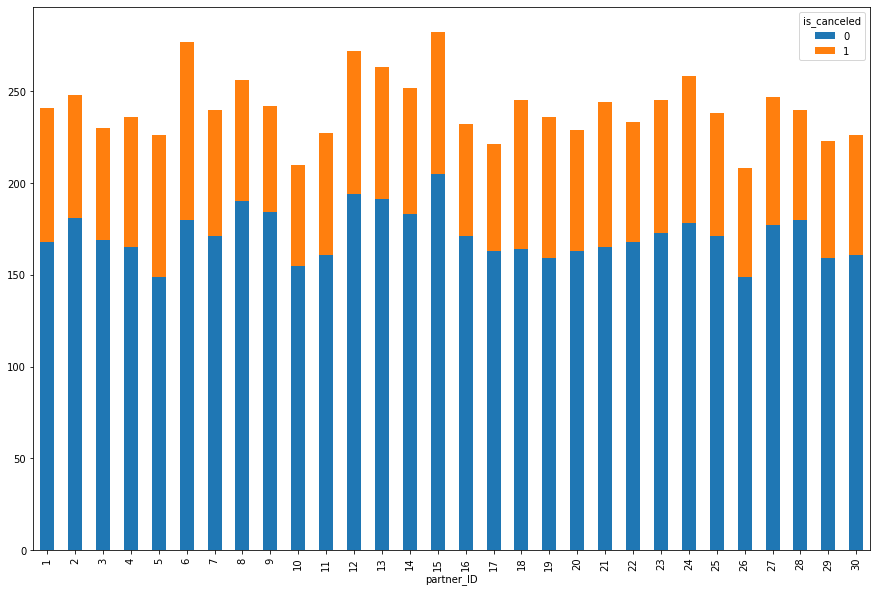

In [95]:

df.groupby(['partner_ID','is_canceled']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,10))
plt.show()

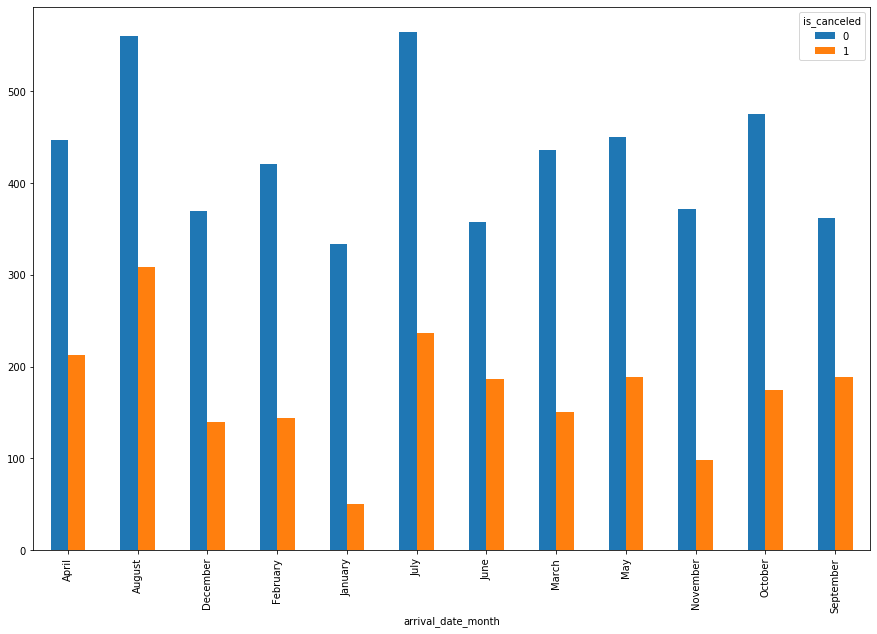

In [96]:
df.groupby(['arrival_date_month','is_canceled']).size().unstack().plot(kind='bar',stacked=False, figsize=(15,10))
plt.show()

In [0]:
plt.figure(figsize=(20,5))

sns.catplot(
    data=df,
    x='Country',
    y='medal count',
    hue='Medal',
    kind='box')